<a href="https://www.kaggle.com/code/anannoasif/car-price-prediction?scriptVersionId=157126685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
df.shape

(2059, 20)

In [4]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
df['Engine'].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

In [8]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD', nan], dtype=object)

In [9]:
df['Max Power'].unique()

array(['87 bhp @ 6000 rpm', '74 bhp @ 4000 rpm', '79 bhp @ 6000 rpm',
       '82 bhp @ 6000 rpm', '148 bhp @ 3400 rpm', '91 bhp @ 6000 rpm',
       '181 bhp @ 5500 rpm', '188 bhp @ 4000 rpm', '177 bhp @ 5100 rpm',
       '84 bhp @ 3750 rpm', '67 bhp @ 5500 rpm', '103 bhp @ 6000 rpm',
       '138 bhp @ 3750 rpm', '103 bhp @ 5000 rpm', '67 bhp @ 6000 rpm',
       '47 bhp @ 6000 rpm', '122 bhp @ 6400 rpm', '68 bhp @ 5500 rpm',
       '118 bhp @ 6000 rpm', '58 bhp @ 6000 rpm', '85 bhp @ 6000 rpm',
       '89 bhp @ 6000 rpm', '126 bhp @ 4000 rpm', '124 bhp @ 6000 rpm',
       nan, '62 bhp @ 5500 rpm', '84 bhp @ 6000 rpm', '69 bhp @ 4000 rpm',
       '168 bhp @ 3000 rpm', '203 bhp @ 4200 rpm', '138 bhp @ 6400 rpm',
       '177 bhp @ 4200 rpm', '165@5500', '105 bhp @ 3800 rpm',
       '83 bhp @ 6000 rpm', '89 bhp @ 4000 rpm', '169 bhp @ 3750 rpm',
       '101 bhp @ 3600 rpm', '190 bhp @ 4000 rpm', '171 bhp @ 3750 rpm',
       '120 bhp @ 4000 rpm', '181 bhp @ 5000 rpm', '117 bhp @ 6600 rpm',
 

In [10]:
df[['Max_Power', 'Max_Power_rpm']] = df['Max Power'].str.split('@', expand=True)

In [11]:
df['Max_Power'] = df['Max_Power'].str.strip()
df['Max_Power_rpm'] = df['Max_Power_rpm'].str.strip()


In [12]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power,Max_Power_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm


In [13]:
df[['Max_Torque', 'Max_Torque_rpm']] = df['Max Torque'].str.split('@', expand=True)

df['Max_Torque'] = df['Max_Torque'].str.strip()
df['Max_Torque_rpm'] = df['Max_Torque_rpm'].str.strip()


In [14]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power,Max_Power_rpm,Max_Torque,Max_Torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm,109 Nm,4500 rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm,190 Nm,2000 rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm,112.7619 Nm,4000 rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm,113 Nm,4200 rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm,343 Nm,1400 rpm


In [15]:
df = df.drop('Max Power', axis =1)
df = df.drop('Max Torque', axis =1)

In [16]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power,Max_Power_rpm,Max_Torque,Max_Torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm,109 Nm,4500 rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm,190 Nm,2000 rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm,112.7619 Nm,4000 rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm,113 Nm,4200 rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm,343 Nm,1400 rpm


In [17]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Max_Power              80
Max_Power_rpm          80
Max_Torque             80
Max_Torque_rpm         80
dtype: int64

In [18]:
dfcopy = df.copy()

In [19]:
dfcopy = dfcopy.dropna()

In [20]:
Engine_Val = dfcopy.Engine.value_counts().values
Engine_In = dfcopy.Engine.value_counts().index

([<matplotlib.patches.Wedge at 0x7eb3a5db2fb0>,
 [Text(0.4318874857383961, 1.0116685226212028, '1197 cc'),
  Text(-1.0739088175676825, 0.2381592986855272, '1248 cc'),
  Text(-0.6676057786429593, -0.8742439729975428, '998 cc'),
  Text(0.34310277916504905, -1.0451222334871744, '1497 cc'),
  Text(1.0061073386659178, -0.44468868108215265, '1968 cc')],
 [Text(0.2355749922209433, 0.5518191941570196, '37.157%'),
  Text(-0.5857684459460086, 0.12990507201028756, '18.740%'),
  Text(-0.36414860653252323, -0.47686034890775053, '17.447%'),
  Text(0.1871469704536631, -0.570066672811186, '13.409%'),
  Text(0.5487858210905006, -0.24255746240844686, '13.247%')])

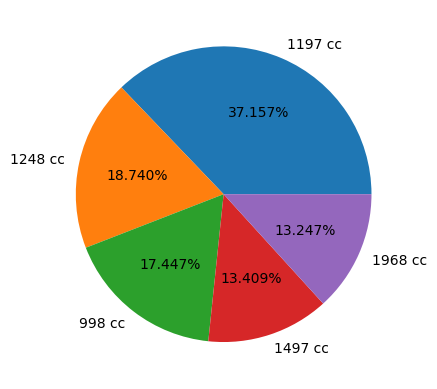

In [21]:
plt.pie(x=Engine_Val[:5], labels= Engine_In[:5], autopct='%.3f%%')

In [22]:
# Function to categorize engine capacities
def categorize_engine(engine):
    if pd.isnull(engine):
        return None
    
    engine = str(engine).split()[0]  # Extracting the numeric part of the engine capacity
    engine = int(engine)  # Converting to integer (removing 'cc' and converting to int)
    
    if engine < 1000:
        return 'Less than 1000 cc'
    elif engine < 1500:
        return '1000 - 1500 cc'
    elif engine < 2000:
        return '1500 - 2000 cc'
    elif engine < 2500:
        return '2000 - 2500 cc'
    else:
        return 'More than 2500 cc'

# Applying the categorization function to the 'Engine' column
df['Engine_Category'] = df['Engine'].apply(categorize_engine)


In [23]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power,Max_Power_rpm,Max_Torque,Max_Torque_rpm,Engine_Category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm,109 Nm,4500 rpm,1000 - 1500 cc
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm,190 Nm,2000 rpm,1000 - 1500 cc
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm,112.7619 Nm,4000 rpm,1000 - 1500 cc
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm,113 Nm,4200 rpm,1000 - 1500 cc
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm,343 Nm,1400 rpm,2000 - 2500 cc


In [24]:
df = df.drop('Engine', axis = 1)

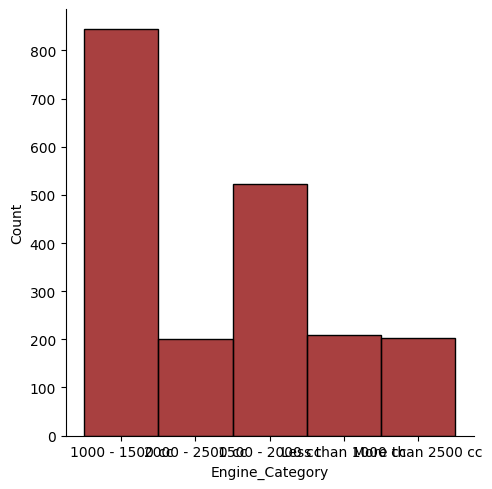

In [25]:
sns.displot(df['Engine_Category'].dropna(), kde = False, color = 'darkred', bins =40)

In [26]:
df[df['Engine_Category'].isna()]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power,Max_Power_rpm,Max_Torque,Max_Torque_rpm,Engine_Category
33,Honda,CR-V 2.4 AT,860000,2013,67000,Petrol,Automatic,Mumbai,Brown,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
69,Audi,A4 2.0 TDI (143 bhp),1250000,2012,50000,Diesel,Automatic,Mumbai,White,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
94,Mercedes-Benz,GLC 220 d Sport,3900000,2018,83400,Diesel,Automatic,Hyderabad,White,Second,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
108,Honda,Brio S MT,229000,2013,38175,Petrol,Manual,Kolkata,Blue,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
127,Tata,Nexon EV XZ Plus,1375000,2021,16000,Electric,Automatic,Mumbai,White,First,...,3993.0,1811.0,1606.0,5.0,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,MG,ZS EV Exclusive [2020-2021],2100000,2020,38500,Electric,Automatic,Delhi,Blue,First,...,4314.0,1809.0,1620.0,5.0,NaN,NaN,NaN,NaN,NaN,None
1928,Porsche,Cayenne 3.2 V6 Petrol,3600000,2014,43000,Petrol,Automatic,Mumbai,White,Second,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1980,Maruti Suzuki,Wagon R VXi 1.0 [2019-2019],420000,2018,50000,Petrol,Manual,Bhubaneswar,White,UnRegistered Car,...,3655.0,1620.0,1675.0,5.0,32.0,NaN,NaN,NaN,NaN,None
2009,Audi,A4 2.0 TDI Sline,775000,2012,89000,Diesel,Automatic,Mohali,Black,Second,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


<Axes: xlabel='Make', ylabel='count'>

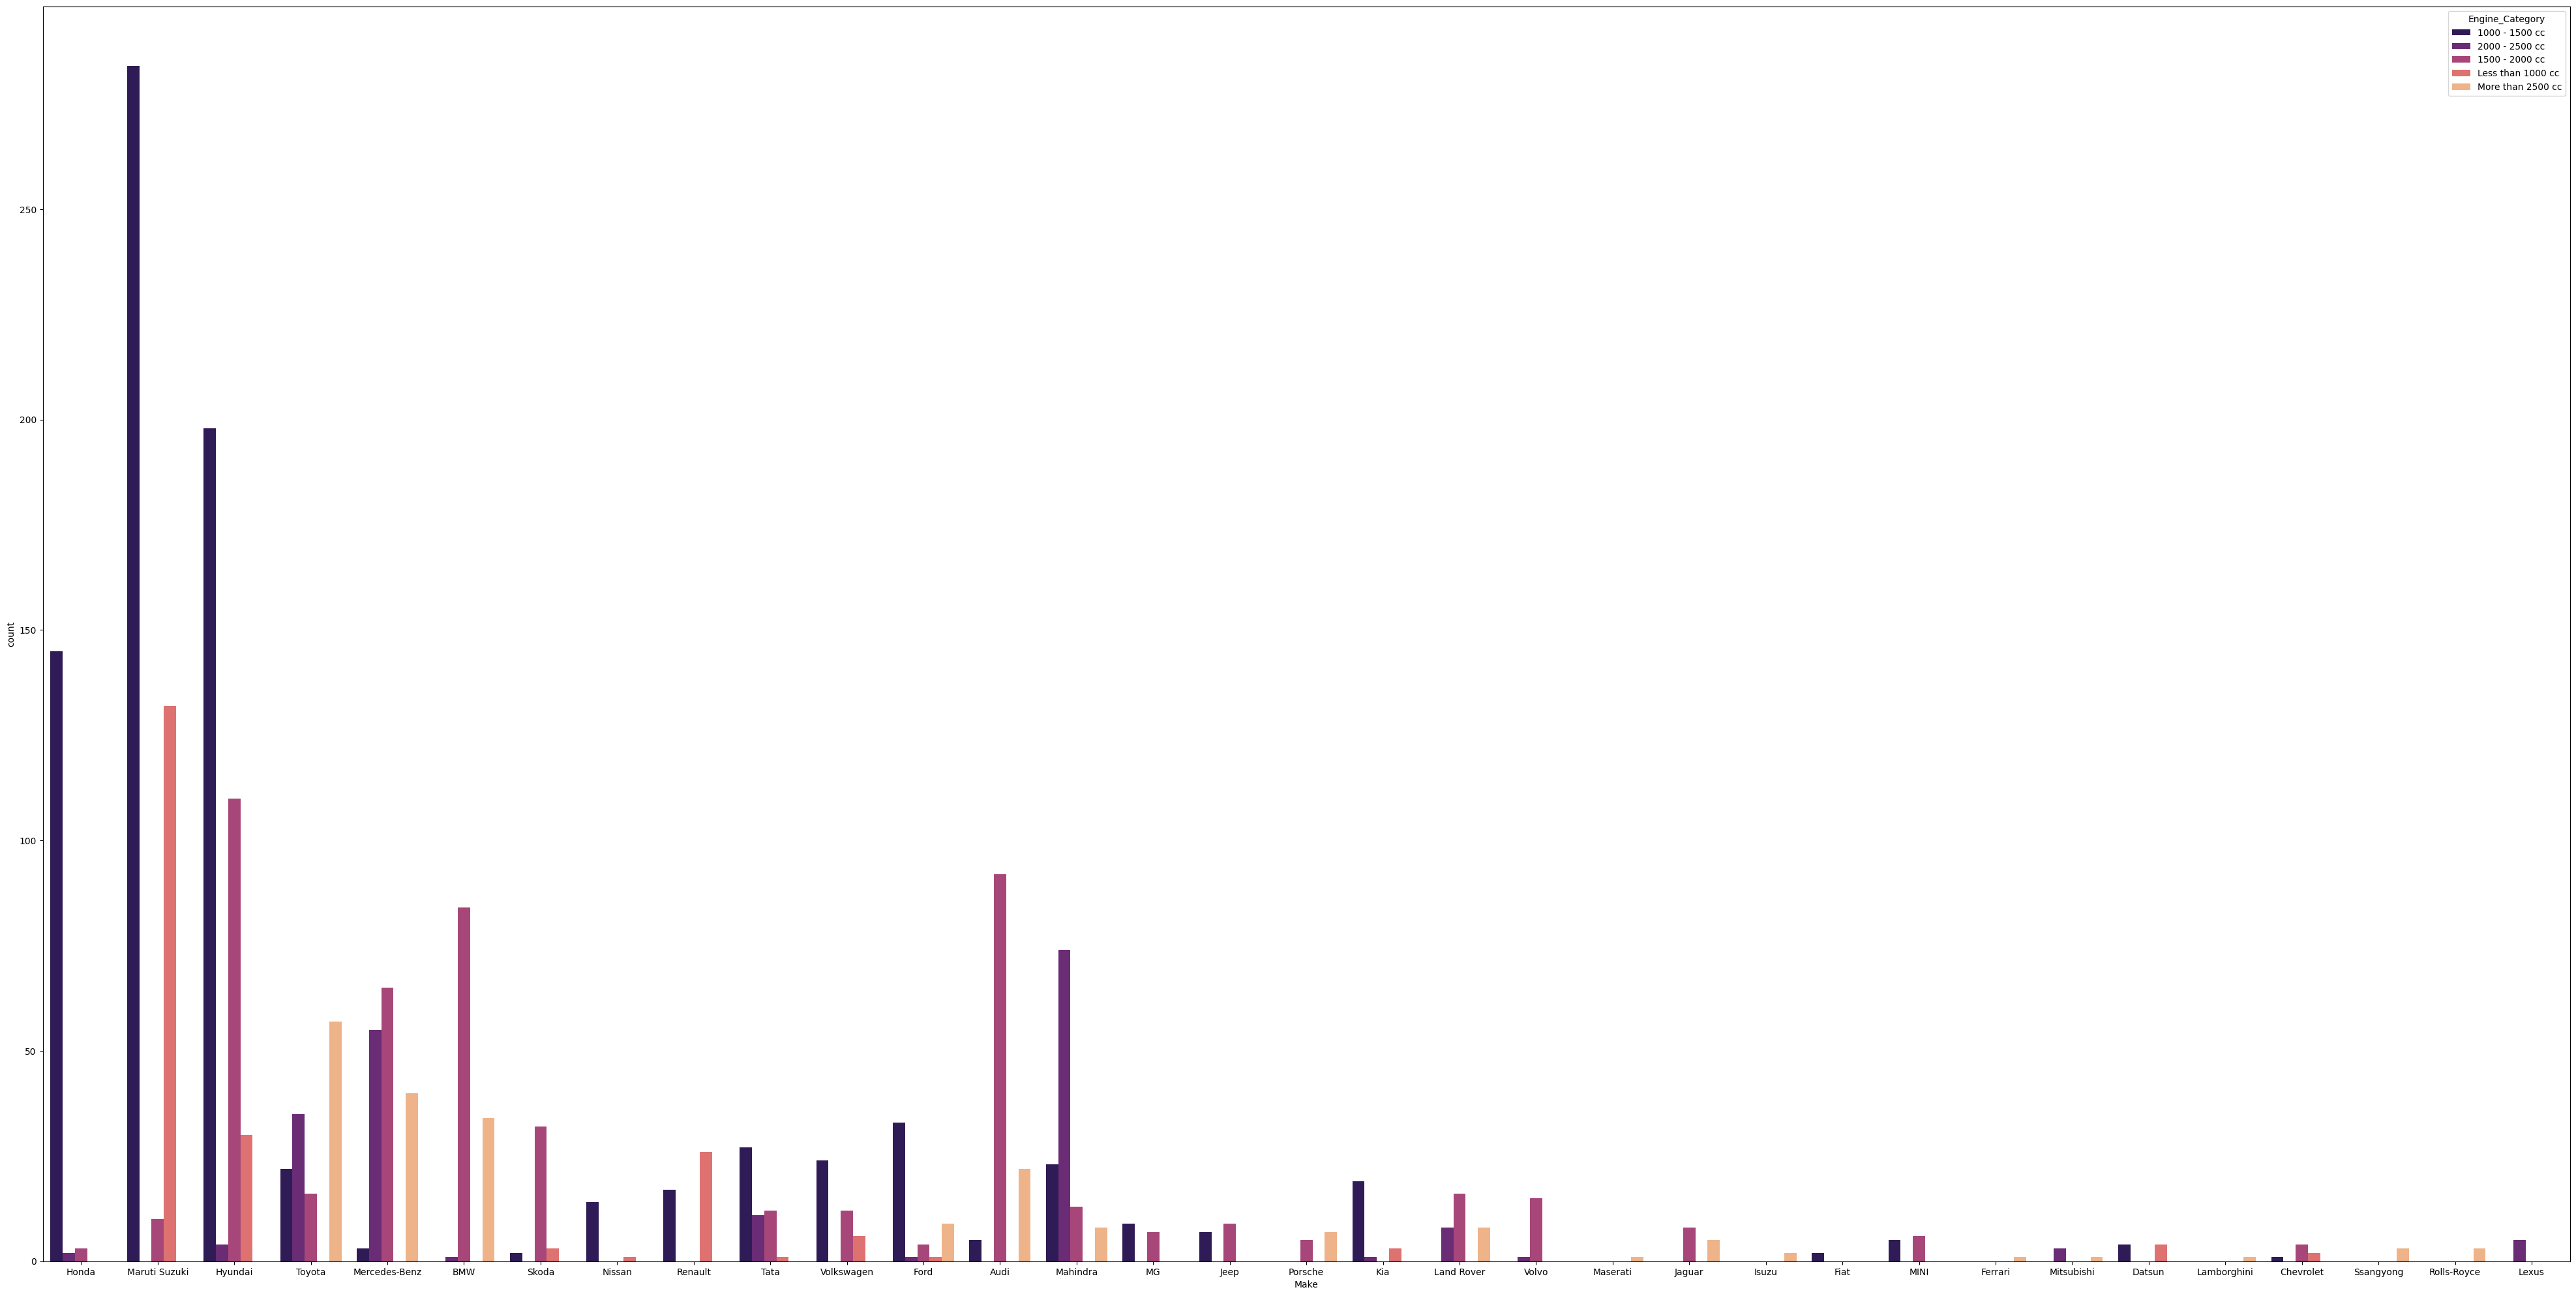

In [27]:
plt.figure(figsize=(50,25))
sns.countplot(x='Make', hue='Engine_Category', data=df, palette='magma')

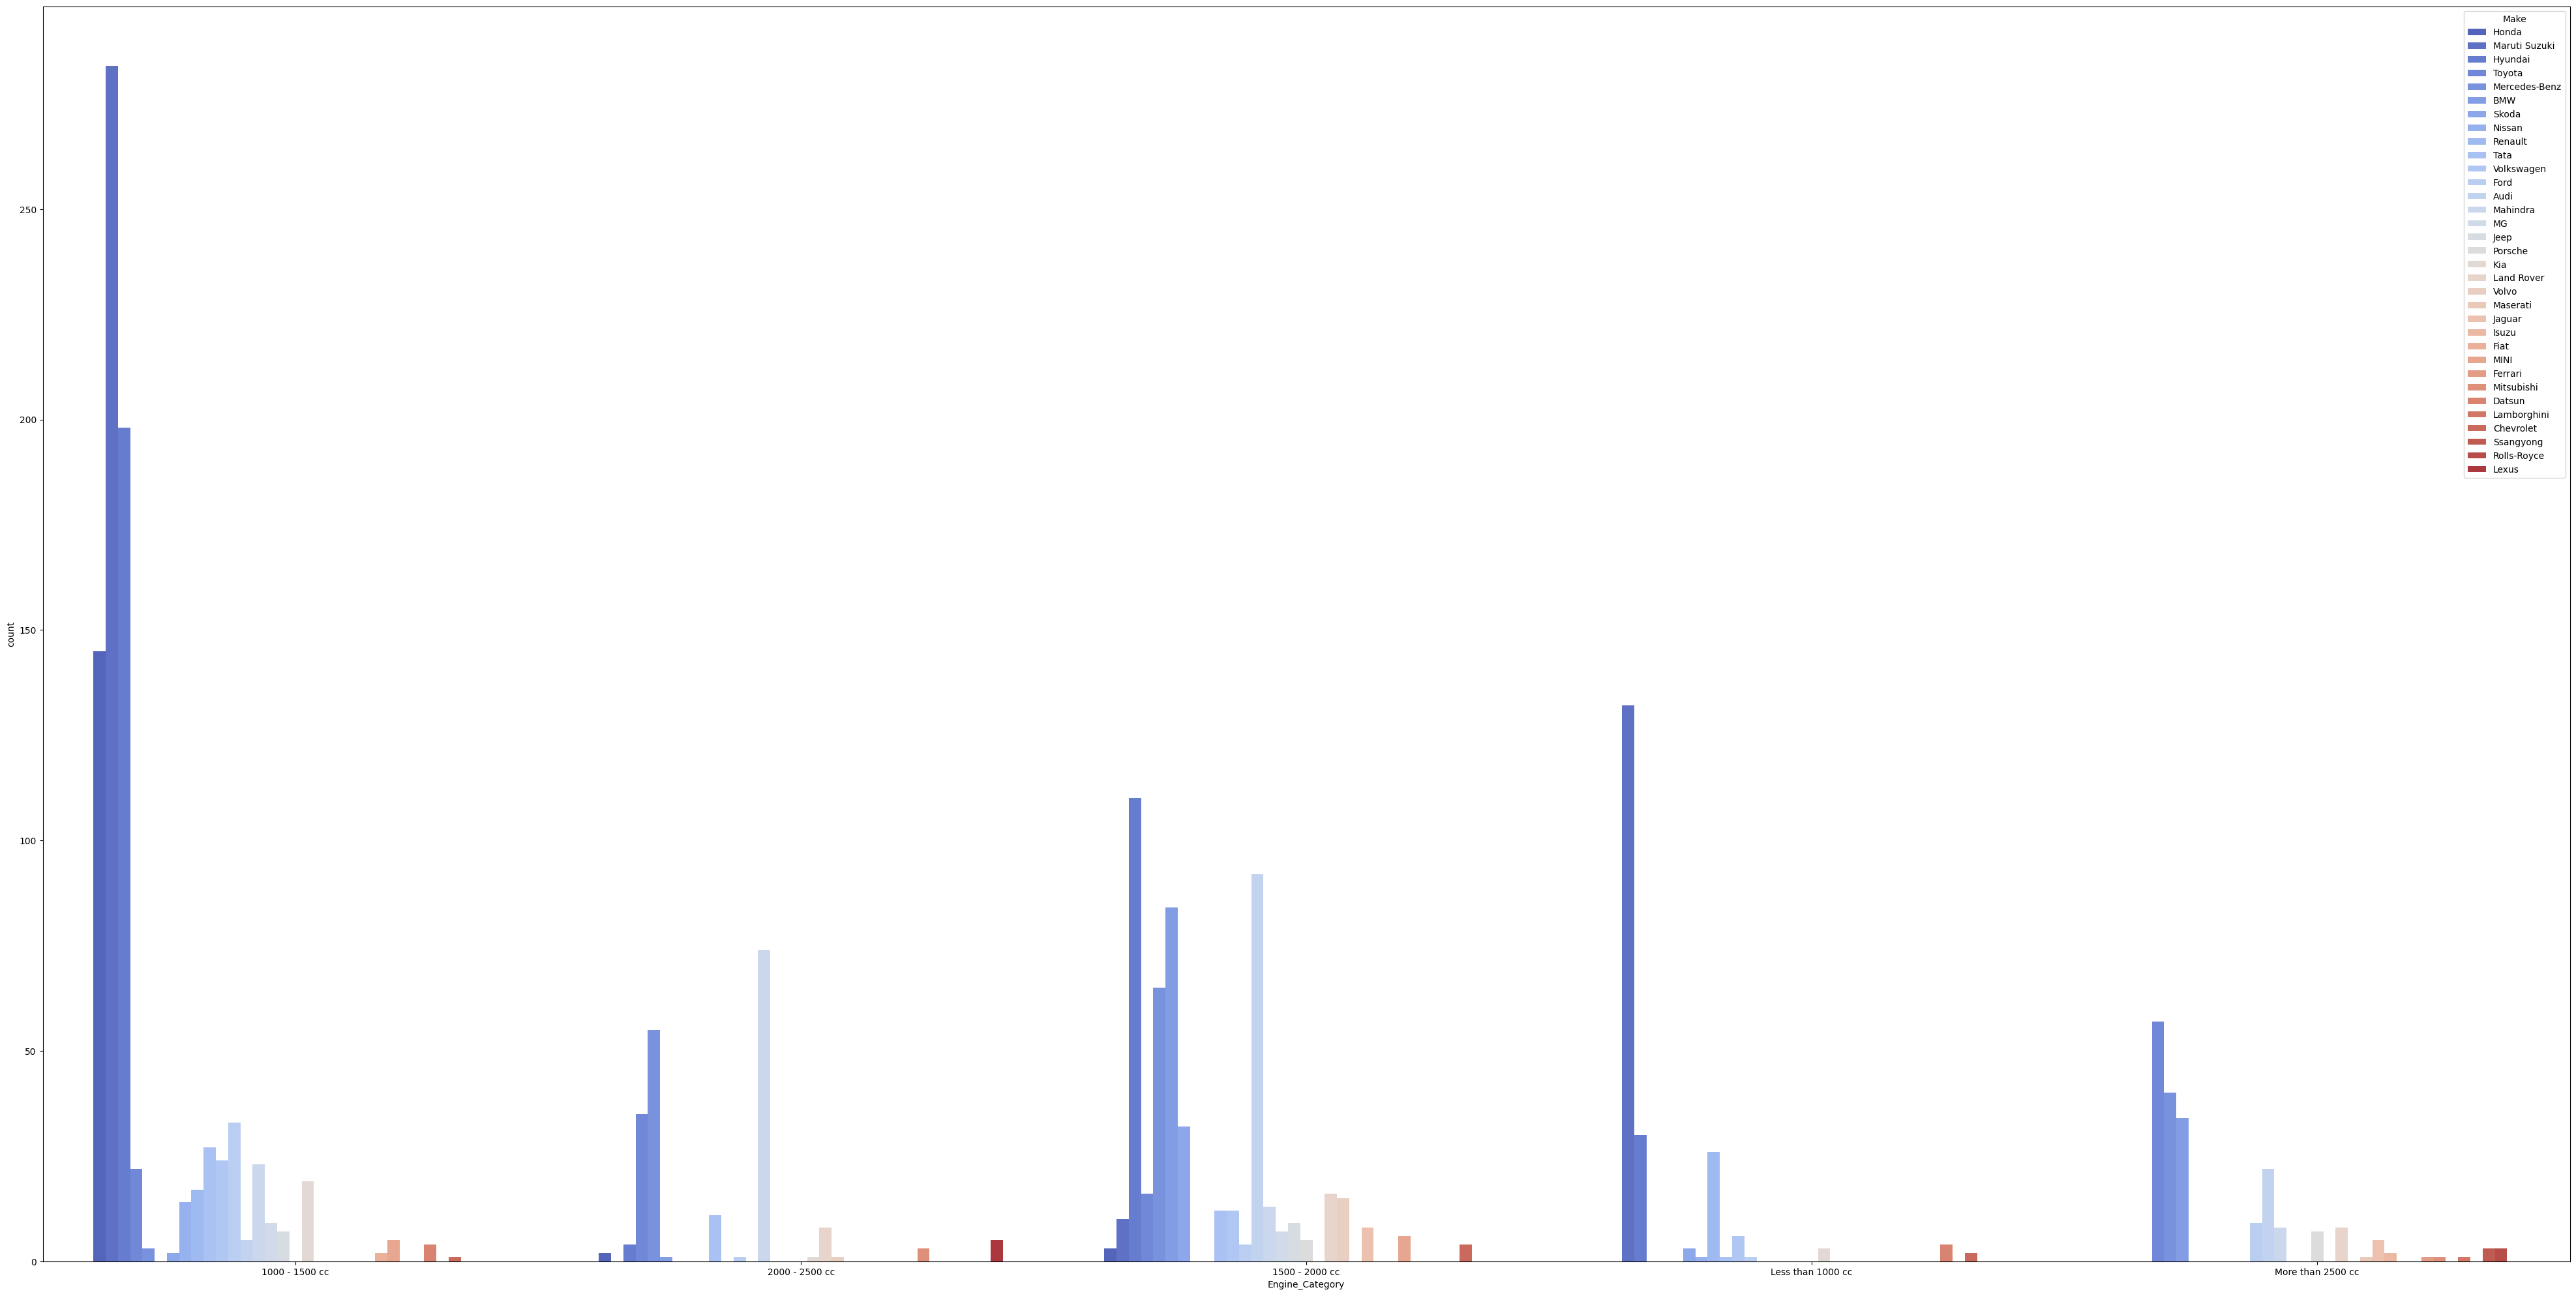

In [28]:
plt.figure(figsize=(50,25))
sns.countplot(x='Engine_Category', hue='Make', data=df, palette='coolwarm')
plt.show()

In [29]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [30]:
df['Engine_Category'].unique()

array(['1000 - 1500 cc', '2000 - 2500 cc', '1500 - 2000 cc',
       'Less than 1000 cc', None, 'More than 2500 cc'], dtype=object)

In [31]:
def impute_engine(cols):
    Engine_Category = cols[0]
    Make = cols[1]

    if pd.isna(Engine_Category):

        if Make == 'Honda':
            return '1500 - 2000 cc'
        elif Make == 'Skoda':
            return '1500 - 2000 cc'
        elif Make == 'Maruti Suzuki':
            return '1000 - 1500 cc'
        elif Make == 'Hyundai':
            return '1000 - 1500 cc'
        elif Make == 'Toyota':
            return '1500 - 2000 cc'
        elif Make == 'Mercedes-Benz':
            return '2000 - 2500 cc'
        elif Make == 'BMW':
            return '1500 - 2000 cc'
        elif Make == 'Nissan':
            return '1000 - 1500 cc'
        elif Make == 'Renault':
            return '1000 - 1500 cc'
        elif Make == 'Tata':
            return 'Less than 1000 cc'
        elif Make == 'Volkswagen':
            return '1000 - 1500 cc'
        elif Make == 'Ford':
            return 'More than 2500 cc'
        elif Make == 'Audi':
            return '1500 - 2000 cc'
        elif Make == 'Mahindra':
            return '2000 - 2500 cc'
        elif Make == 'MG':
            return '1500 - 2000 cc'
        elif Make == 'Jeep':
            return '1500 - 2000 cc'
        elif Make == 'Porsche':
            return 'More than 2500 cc'
        elif Make == 'Kia':
            return '1000 - 1500 cc'
        elif Make == 'Land Rover':
            return '2000 - 2500 cc'
        elif Make == 'Volvo':
            return '1500 - 2000 cc'
        elif Make == 'Maserati':
            return 'More than 2500 cc'
        elif Make == 'Jaguar':
            return 'More than 2500 cc'
        elif Make == 'Isuzu':
            return 'More than 2500 cc'
        elif Make == 'Fiat':
            return '1000 - 1500 cc'
        elif Make == 'MINI':
            return '1500 - 2000 cc'
        elif Make == 'Ferrari':
            return 'More than 2500 cc'
        elif Make == 'Mitsubishi':
            return '2000 - 2500 cc'
        elif Make == 'Datsun':
            return '1500 - 2000 cc'
        elif Make == 'Lamborghini':
            return 'More than 2500 cc'
        elif Make == 'Chevrolet':
            return '1500 - 2000 cc'
        elif Make == 'Ssangyong':
            return 'More than 2500 cc'
        elif Make == 'Rolls-Royce':
            return 'More than 2500 cc'
        elif Make == 'Lexus':
            return '2000 - 2500 cc'
        
    else:
        return Engine_Category

In [32]:
df['Engine_Category'] = df[['Engine_Category', 'Make']].apply(impute_engine, axis=1)

In [33]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Max_Power              80
Max_Power_rpm          80
Max_Torque             80
Max_Torque_rpm         80
Engine_Category         0
dtype: int64

<Axes: xlabel='Engine_Category', ylabel='count'>

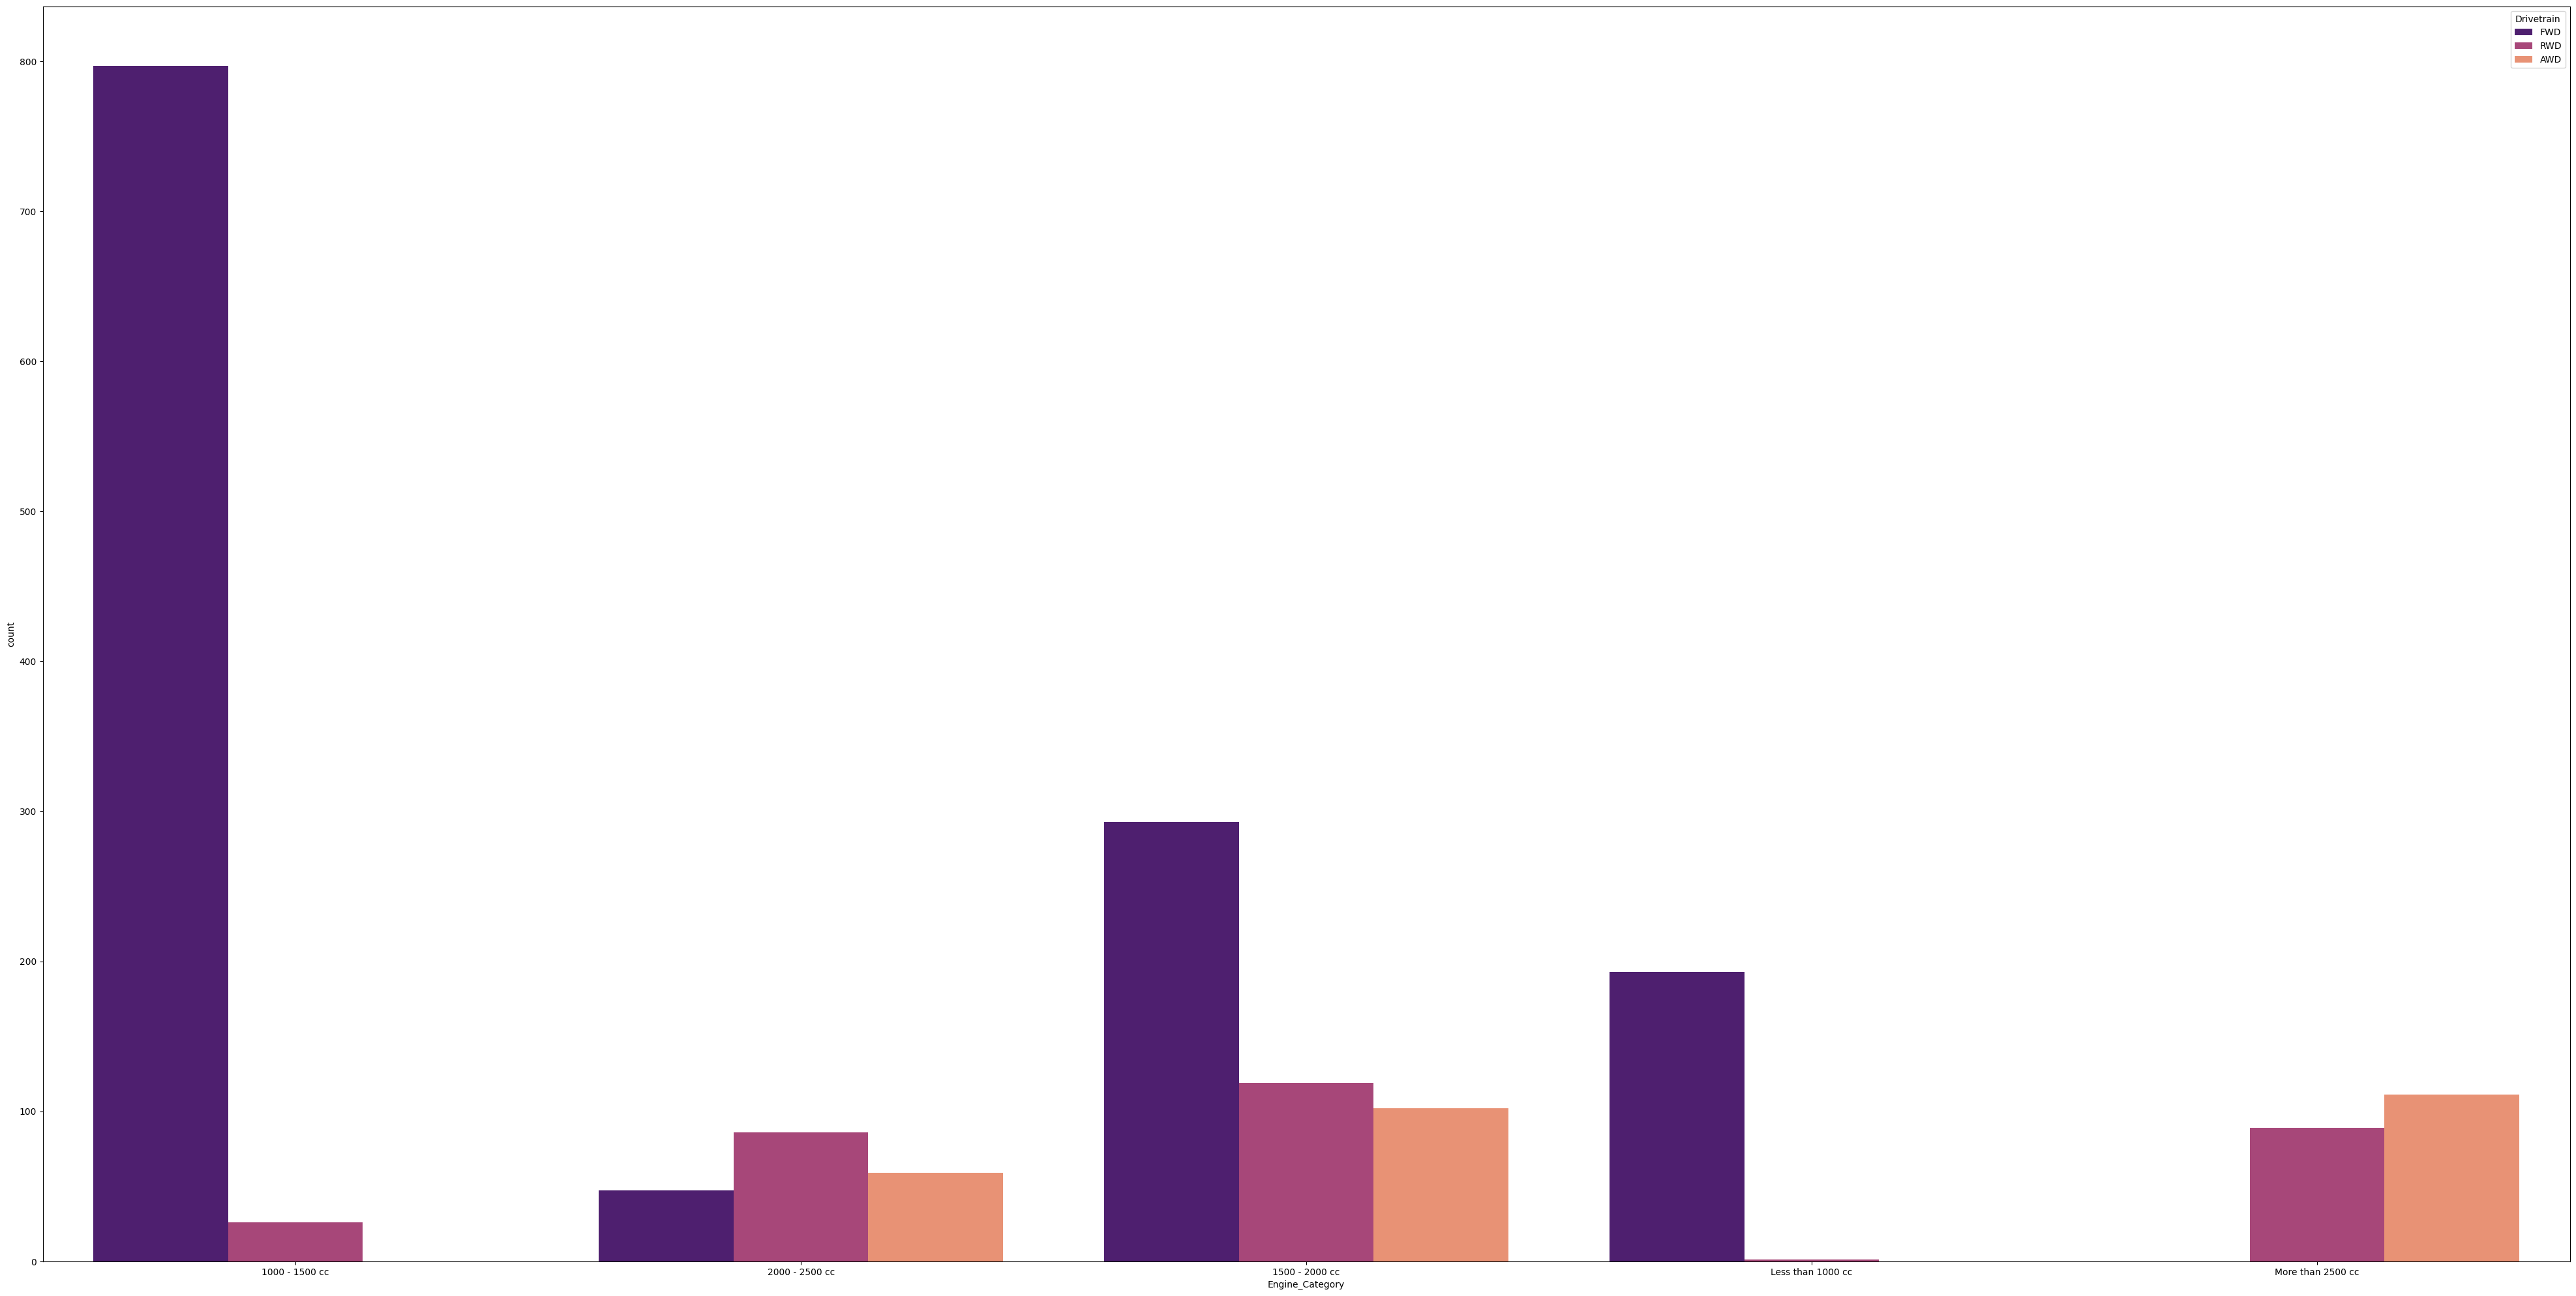

In [34]:
plt.figure(figsize=(50,25))
sns.countplot(x='Engine_Category', hue='Drivetrain', data=df, palette='magma')

In [35]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD', nan], dtype=object)

In [36]:
def impute_drivetrain(cols):
    Drivetrain = cols[0]
    Engine_Category = cols[1]
    

    if pd.isna(Drivetrain):

        if Engine_Category == '1000 - 1500 cc':
            return 'FWD'
        elif Engine_Category == '1500 - 2000 cc':
            return 'FWD'
        elif Engine_Category == 'Less than 1000 cc':
            return 'FWD'
        else:
            return 'AWD'
        
    else:
        return Drivetrain

In [37]:
df['Drivetrain'] = df[['Drivetrain', 'Engine_Category']].apply(impute_drivetrain, axis=1)

In [38]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Max_Power              80
Max_Power_rpm          80
Max_Torque             80
Max_Torque_rpm         80
Engine_Category         0
dtype: int64

<Axes: xlabel='Engine_Category', ylabel='Fuel Tank Capacity'>

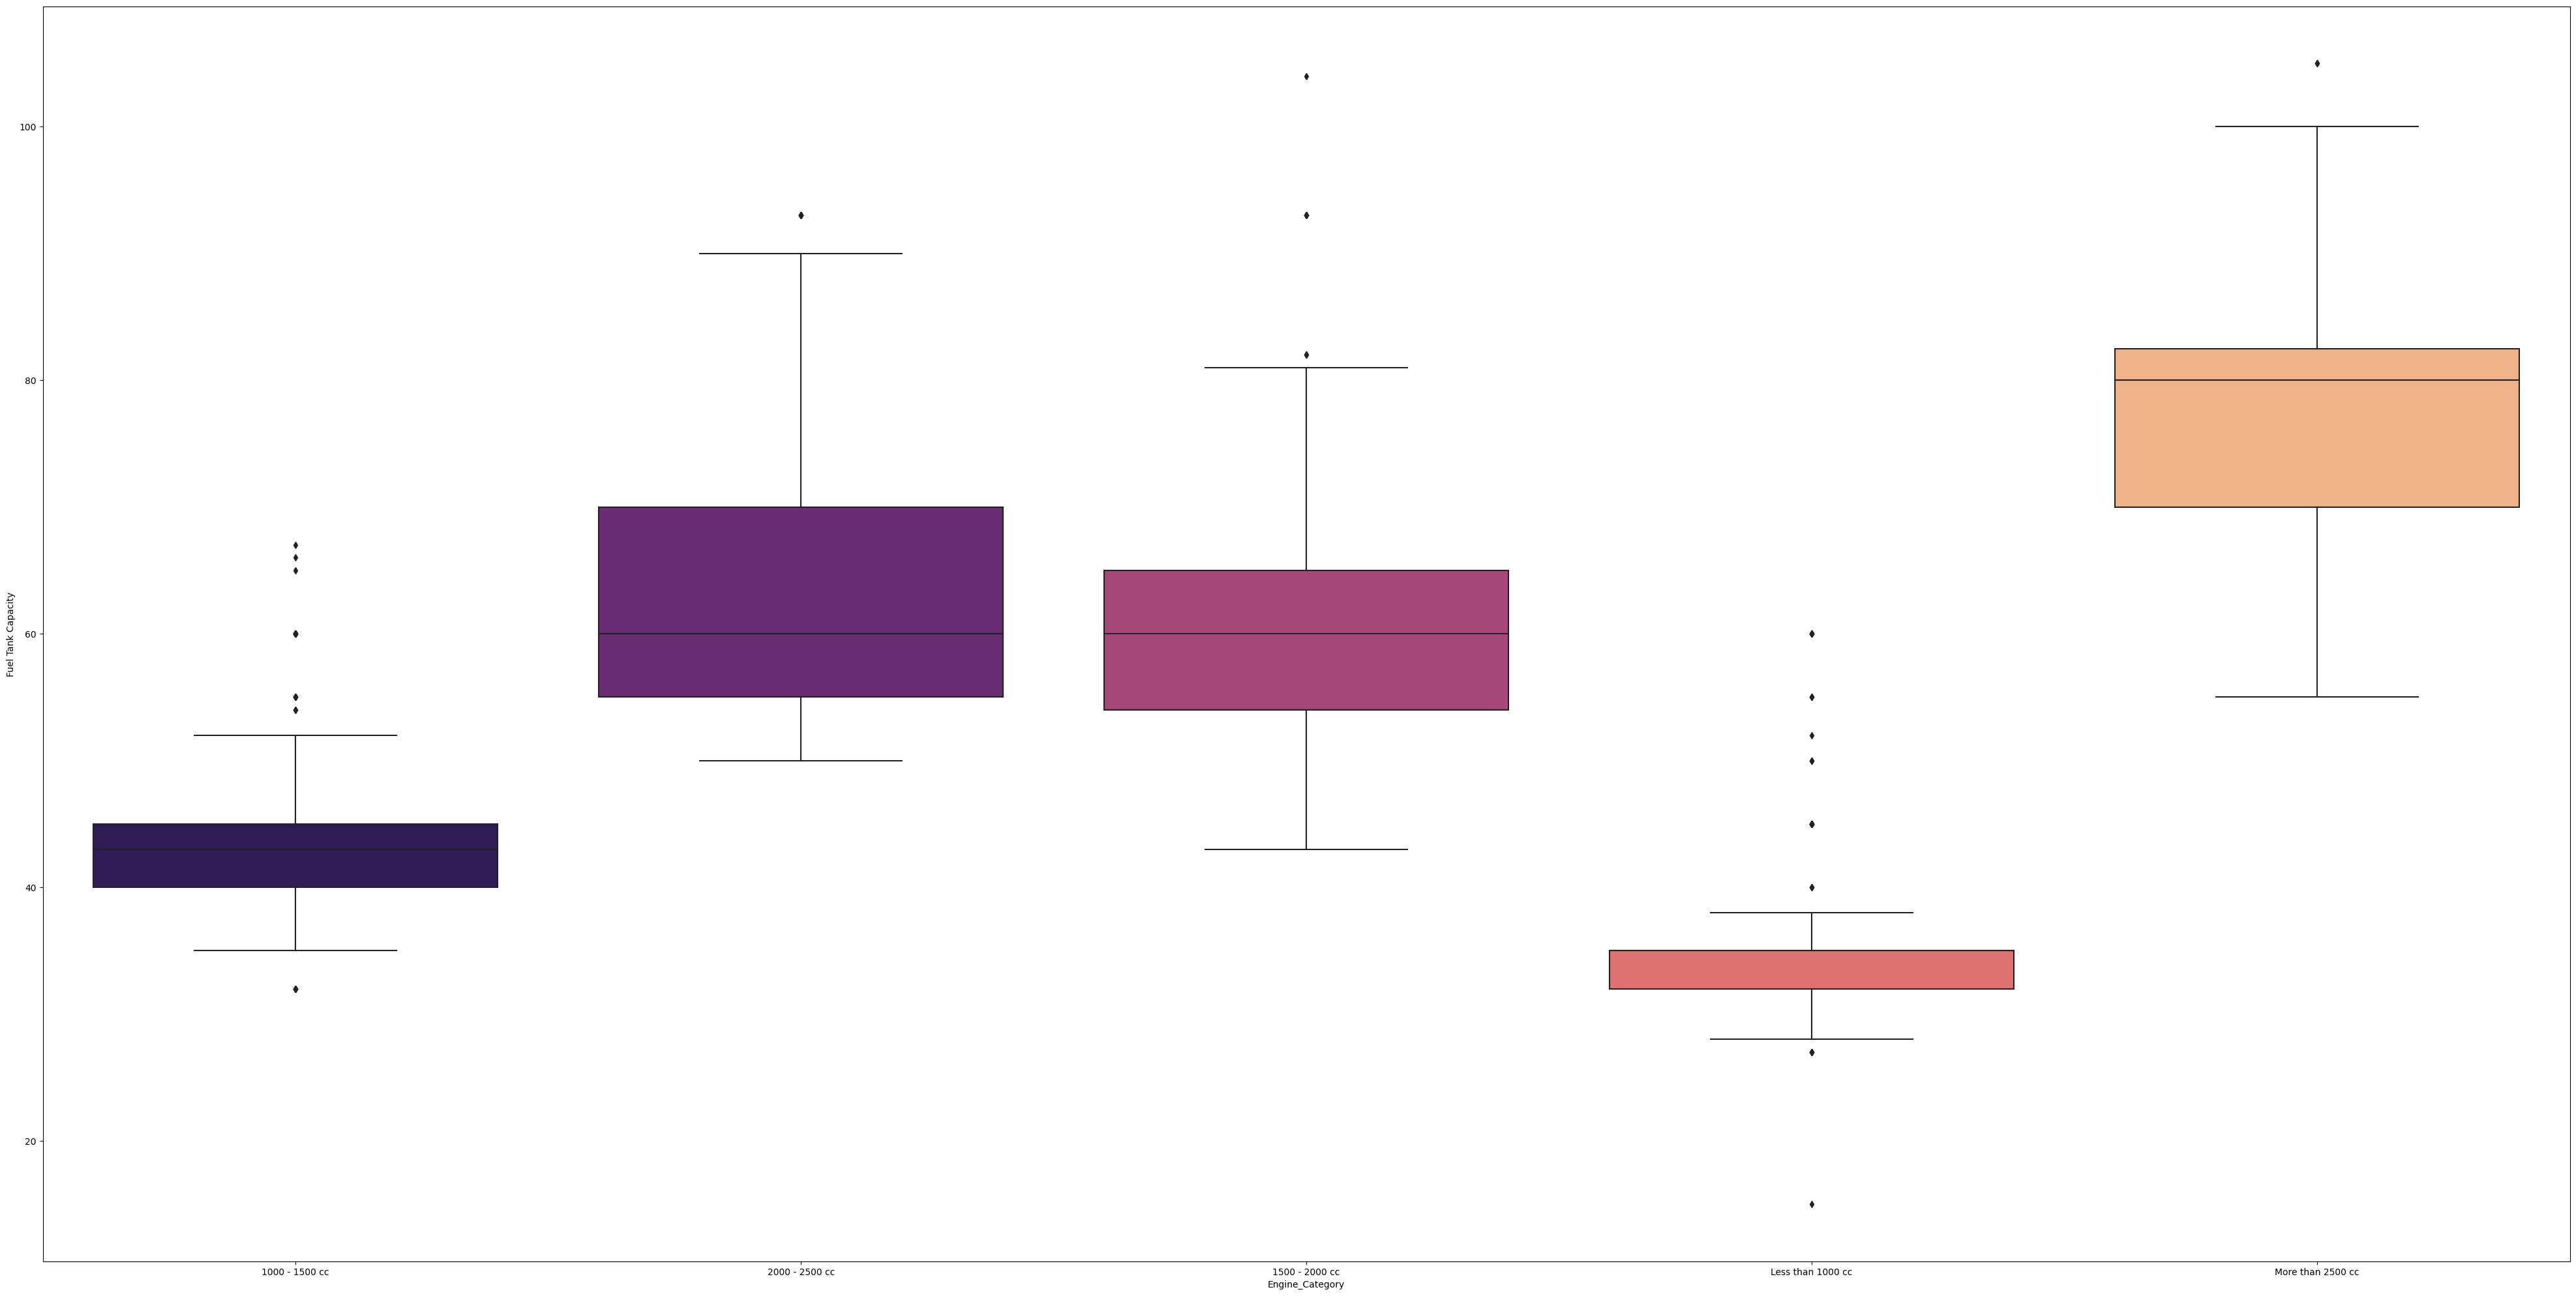

In [39]:
plt.figure(figsize=(50,25))
sns.boxplot(x='Engine_Category', y='Fuel Tank Capacity', data=df, palette= 'magma')

In [40]:
df['Fuel Tank Capacity'].unique()

array([ 35. ,  42. ,  37. ,  55. ,  43. ,   nan,  51. ,  50. ,  45. ,
        28. ,  32. ,  60. ,  27. ,  40. ,  52. ,  66. ,  70. ,  63. ,
        67. ,  57. ,  48. ,  80. ,  64. ,  65. ,  75. ,  59. ,  44. ,
        93. ,  58. , 100. ,  95. ,  90. ,  82. , 104. ,  85. ,  56. ,
        68. ,  62. ,  66.5,  47. ,  54. ,  78. ,  71. ,  15. , 105. ,
        41. ,  77. ,  92. ,  83. ,  73. ,  82.5,  60.9,  67.5,  81. ,
        61. ,  38. ])

In [41]:
df.rename(columns={'Fuel Tank Capacity': 'Fuel_Tank_Capacity'}, inplace=True)

In [42]:
def impute_fueltankcapacity(cols):
    Fuel_Tank_Capacity = cols[0]
    Engine_Category = cols[1]
    

    if pd.isna(Fuel_Tank_Capacity):

        if Engine_Category == '1000 - 1500 cc':
            return 42.00
        elif Engine_Category == '1500 - 2000 cc':
            return 61.00
        elif Engine_Category == 'Less than 1000 cc':
            return 37.00
        elif Engine_Category == 'More than 2500 cc':
            return 82.00
        else:
            return 63.00
        
    else:
        return Fuel_Tank_Capacity

In [43]:
df['Fuel_Tank_Capacity'] = df[['Fuel_Tank_Capacity', 'Engine_Category']].apply(impute_fueltankcapacity, axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating Capacity    1995 non-null   float64
 16  Fuel_T

In [45]:
df.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Drivetrain             0
Length                64
Width                 64
Height                64
Seating Capacity      64
Fuel_Tank_Capacity     0
Max_Power             80
Max_Power_rpm         80
Max_Torque            80
Max_Torque_rpm        80
Engine_Category        0
dtype: int64

In [46]:
df = df.drop(['Max_Power_rpm', 'Max_Torque_rpm'], axis=1)

In [47]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel_Tank_Capacity,Max_Power,Max_Torque,Engine_Category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,109 Nm,1000 - 1500 cc
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,190 Nm,1000 - 1500 cc
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,112.7619 Nm,1000 - 1500 cc
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,113 Nm,1000 - 1500 cc
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,343 Nm,2000 - 2500 cc


In [48]:
df.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Drivetrain             0
Length                64
Width                 64
Height                64
Seating Capacity      64
Fuel_Tank_Capacity     0
Max_Power             80
Max_Torque            80
Engine_Category        0
dtype: int64

<Axes: xlabel='Engine_Category', ylabel='count'>

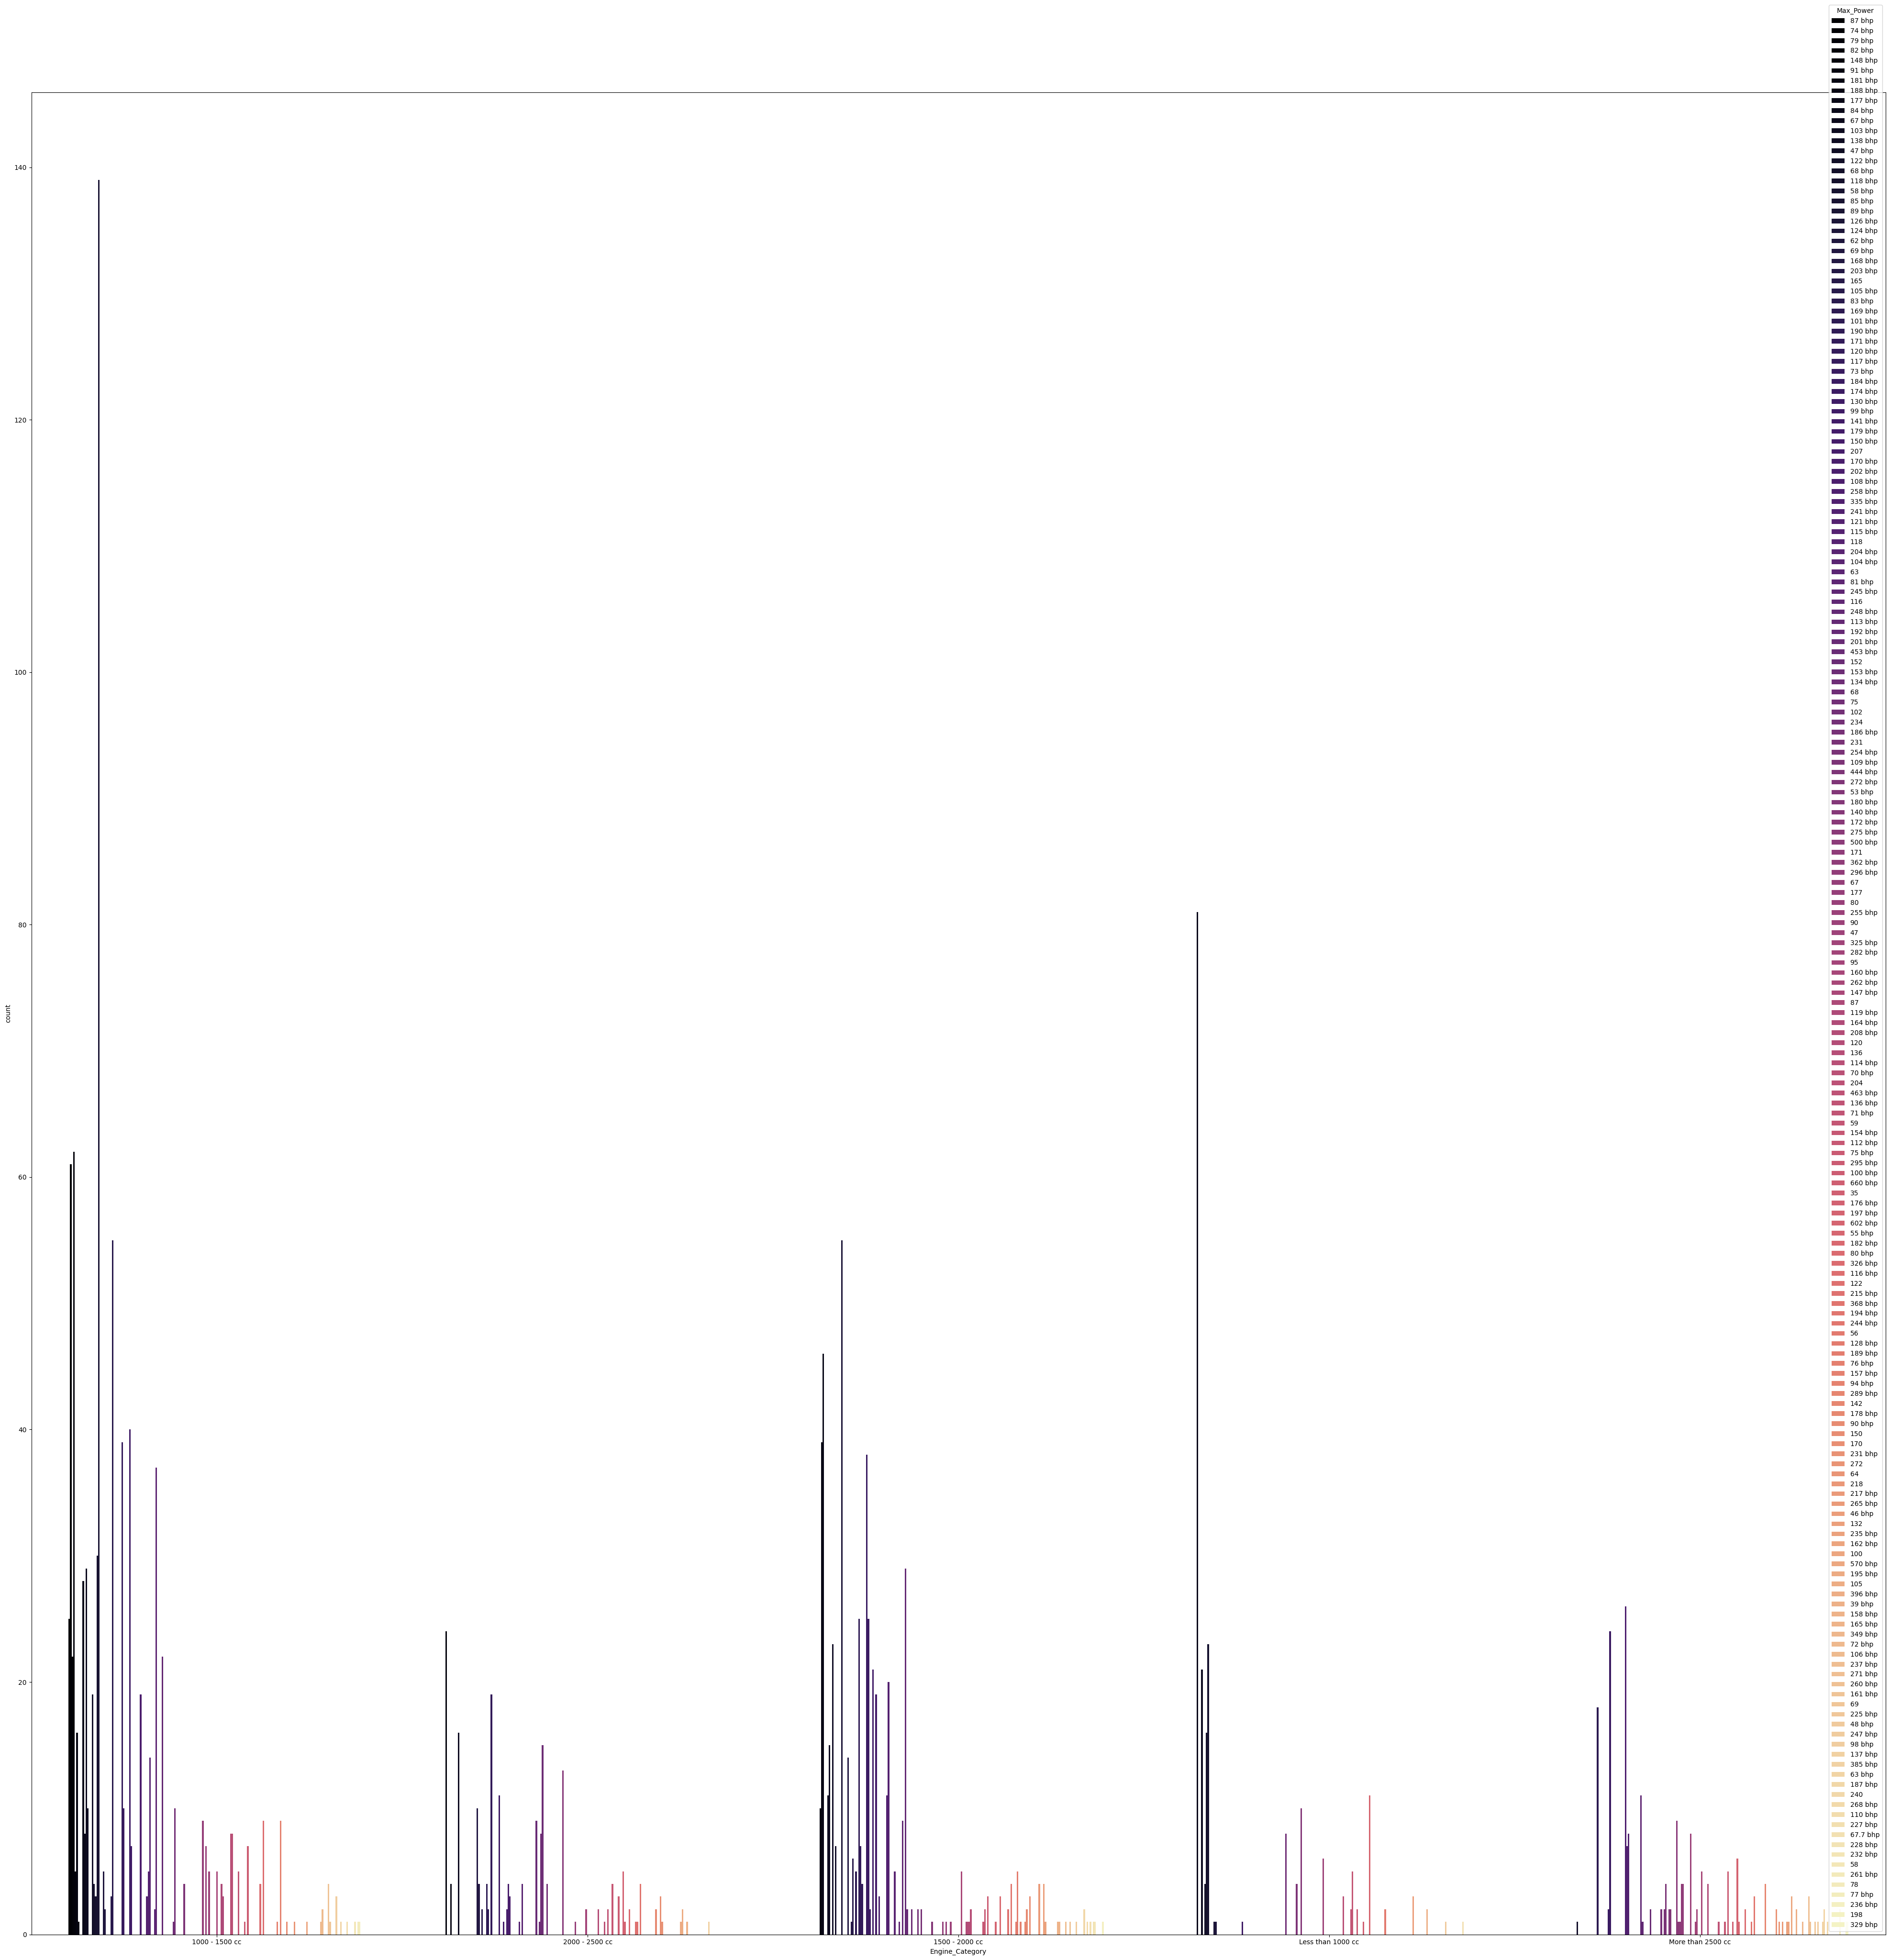

In [49]:
plt.figure(figsize=(50,50))
sns.countplot(x='Engine_Category', hue='Max_Power', data=df, palette= 'magma')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating Capacity    1995 non-null   float64
 16  Fuel_T

In [51]:
def impute_maxpower(cols):
    Max_Power = cols[0]
    Engine_Category = cols[1]
    

    if pd.isna(Max_Power):

        if Engine_Category == '1000 - 1500 cc':
            return '89 bhp'
        elif Engine_Category == '1500 - 2000 cc':
            return '101 bhp'
        elif Engine_Category == 'Less than 1000 cc':
            return '68 bhp'
        elif Engine_Category == 'More than 2500 cc':
            return '201 bhp'
        else:
            return '168 bhp'
        
    else:
        return Max_Power

In [52]:
df['Max_Power'] = df[['Max_Power', 'Engine_Category']].apply(impute_maxpower, axis=1)

<Axes: xlabel='Engine_Category', ylabel='count'>

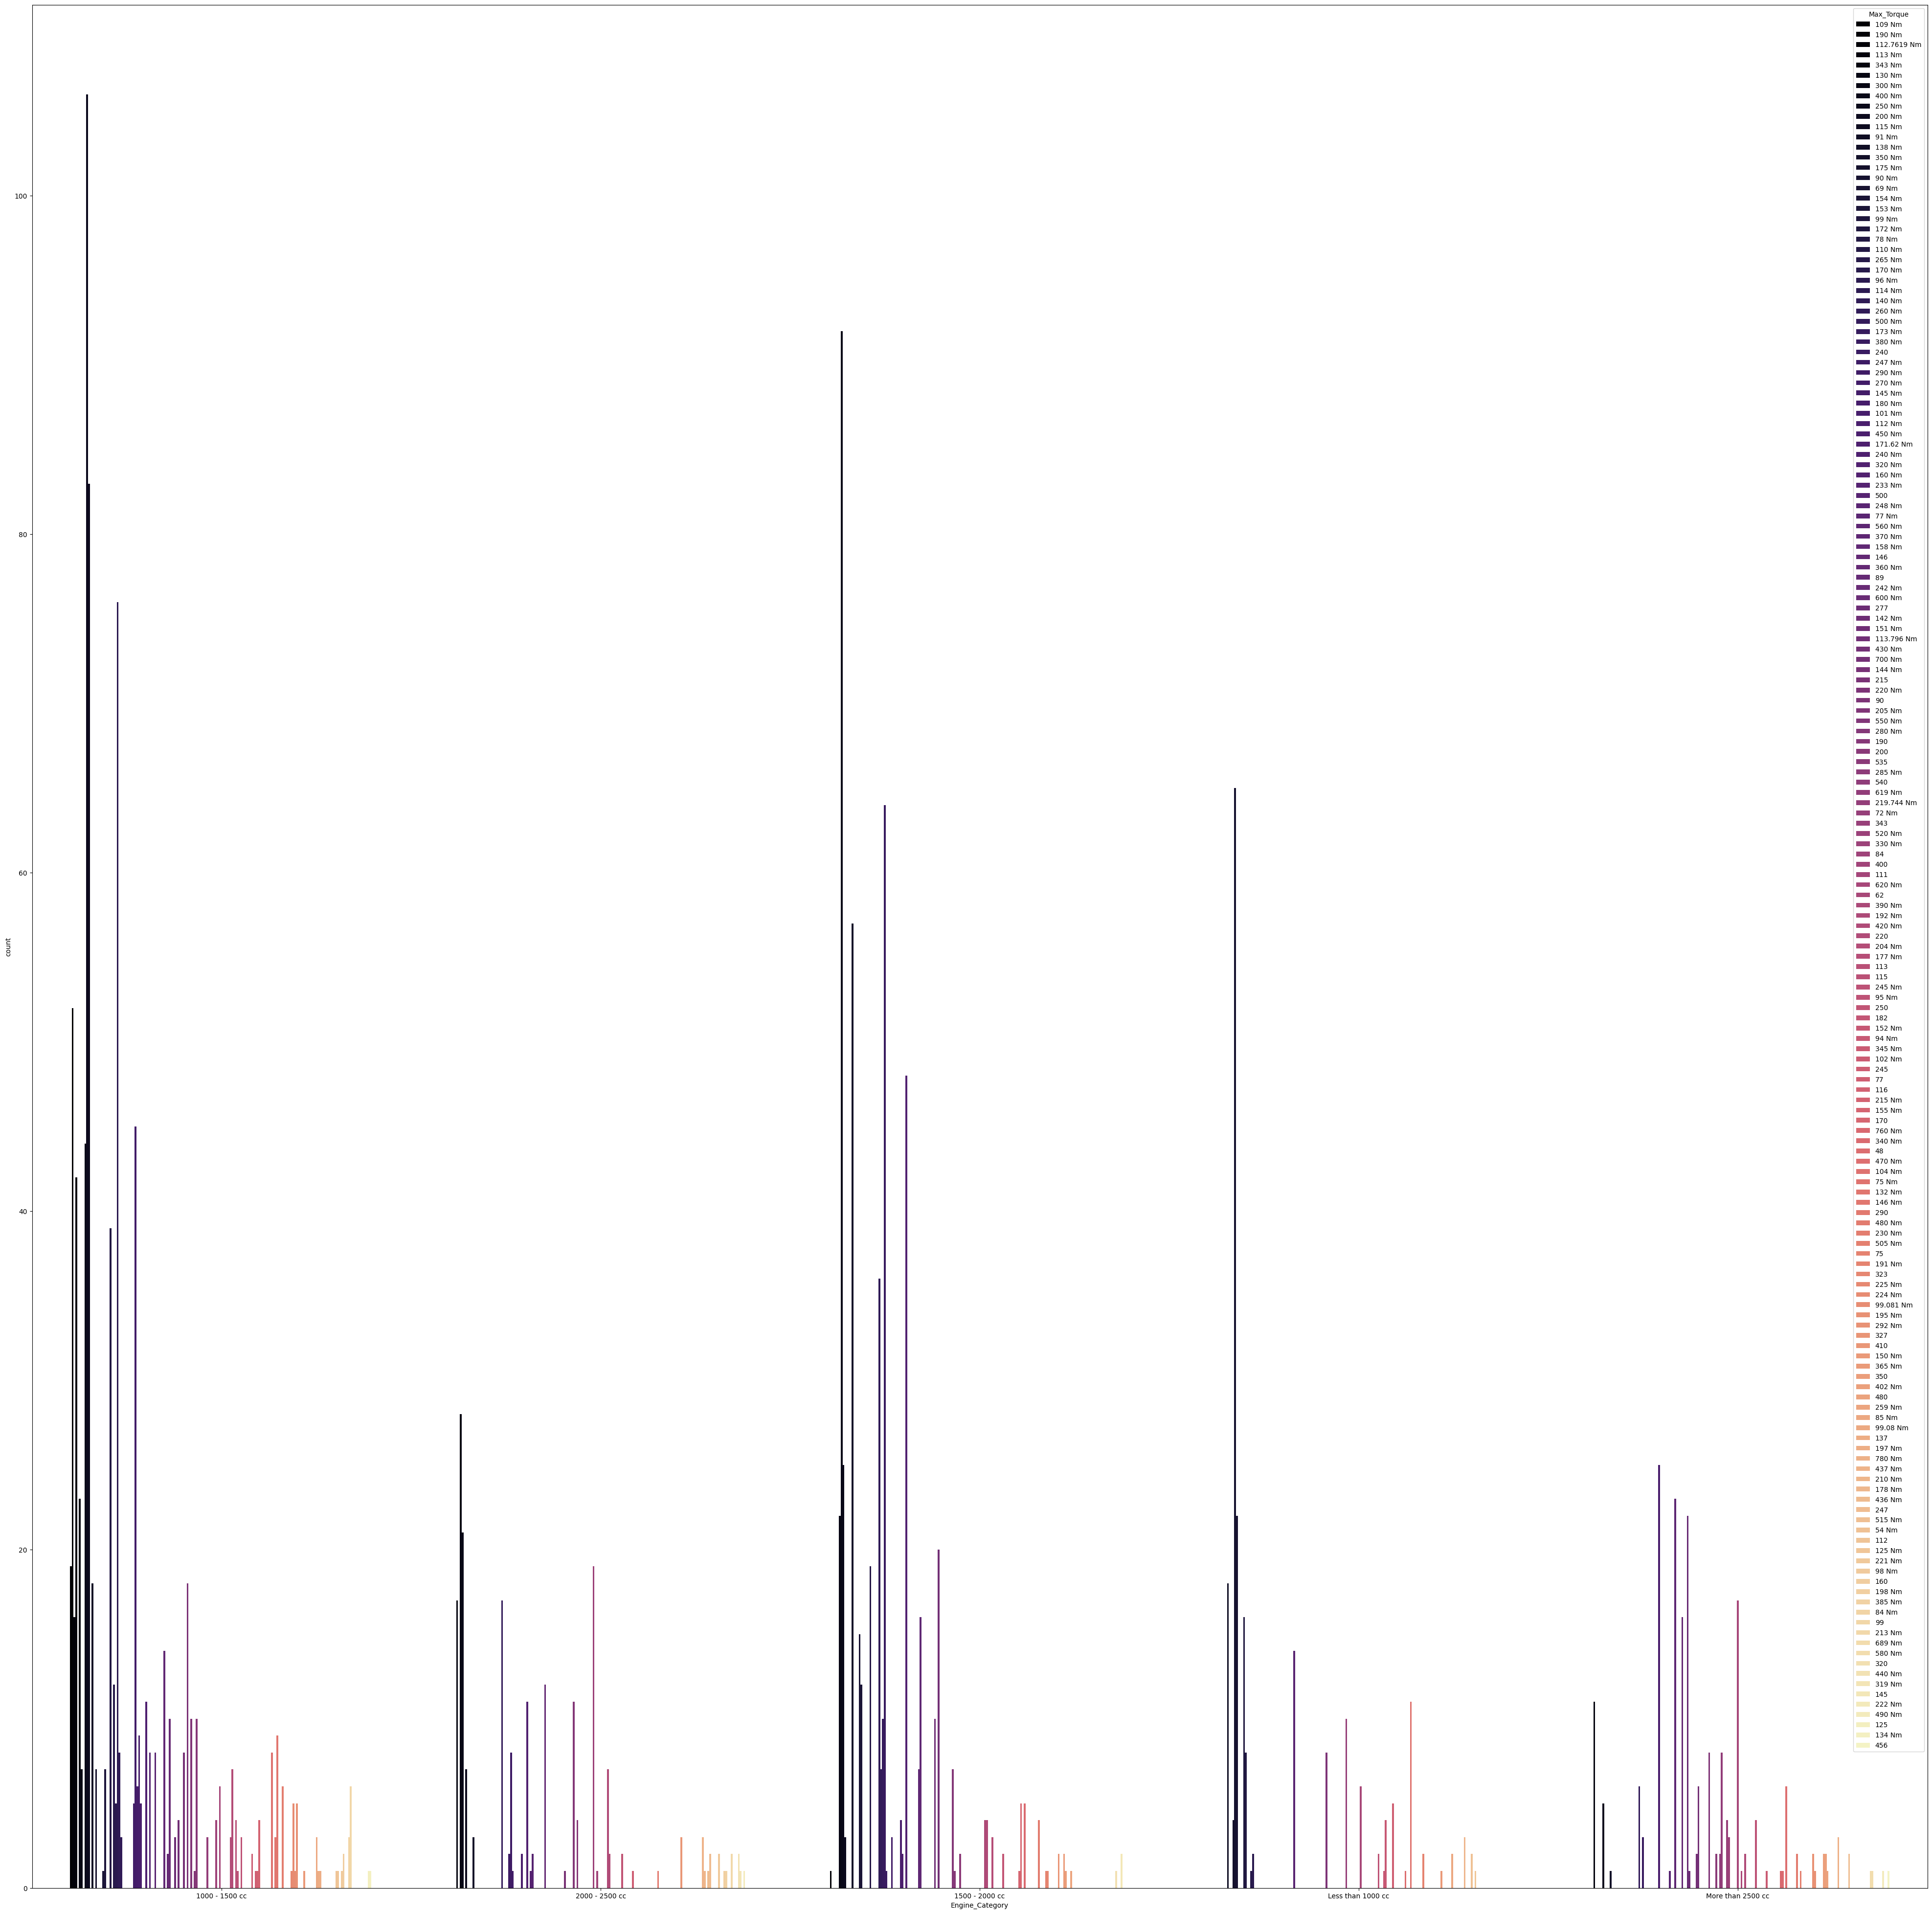

In [53]:
plt.figure(figsize=(50,50))
sns.countplot(x='Engine_Category', hue='Max_Torque', data=df, palette= 'magma')

In [54]:
def impute_maxtorque(cols):
    Max_Torque = cols[0]
    Engine_Category = cols[1]
    

    if pd.isna(Max_Torque):

        if Engine_Category == '1000 - 1500 cc':
            return '99 Nm'
        elif Engine_Category == '1500 - 2000 cc':
            return '173 Nm'
        elif Engine_Category == 'Less than 1000 cc':
            return '90 Nm'
        elif Engine_Category == 'More than 2500 cc':
            return '201 Nm'
        else:
            return '360 Nm'
        
    else:
        return Max_Torque

In [55]:
df['Max_Torque'] = df[['Max_Torque', 'Engine_Category']].apply(impute_maxtorque, axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating Capacity    1995 non-null   float64
 16  Fuel_T

In [57]:
df[['Max_Power_numeric', 'Max_Power_unit']] = df['Max_Power'].str.split(' ', expand=True)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating Capacity    1995 non-null   float64
 16  Fuel_T

In [59]:
df[['Max_Torque_numeric', 'Max_Torque_Unit']] = df['Max_Torque'].str.split(' ', expand=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating Capacity    1995 non-null   float64
 16  Fuel_T

In [61]:
df = df.drop(['Max_Power', 'Max_Torque', 'Max_Power_unit', 'Max_Torque_Unit'], axis=1)

<Axes: xlabel='Engine_Category', ylabel='Seating Capacity'>

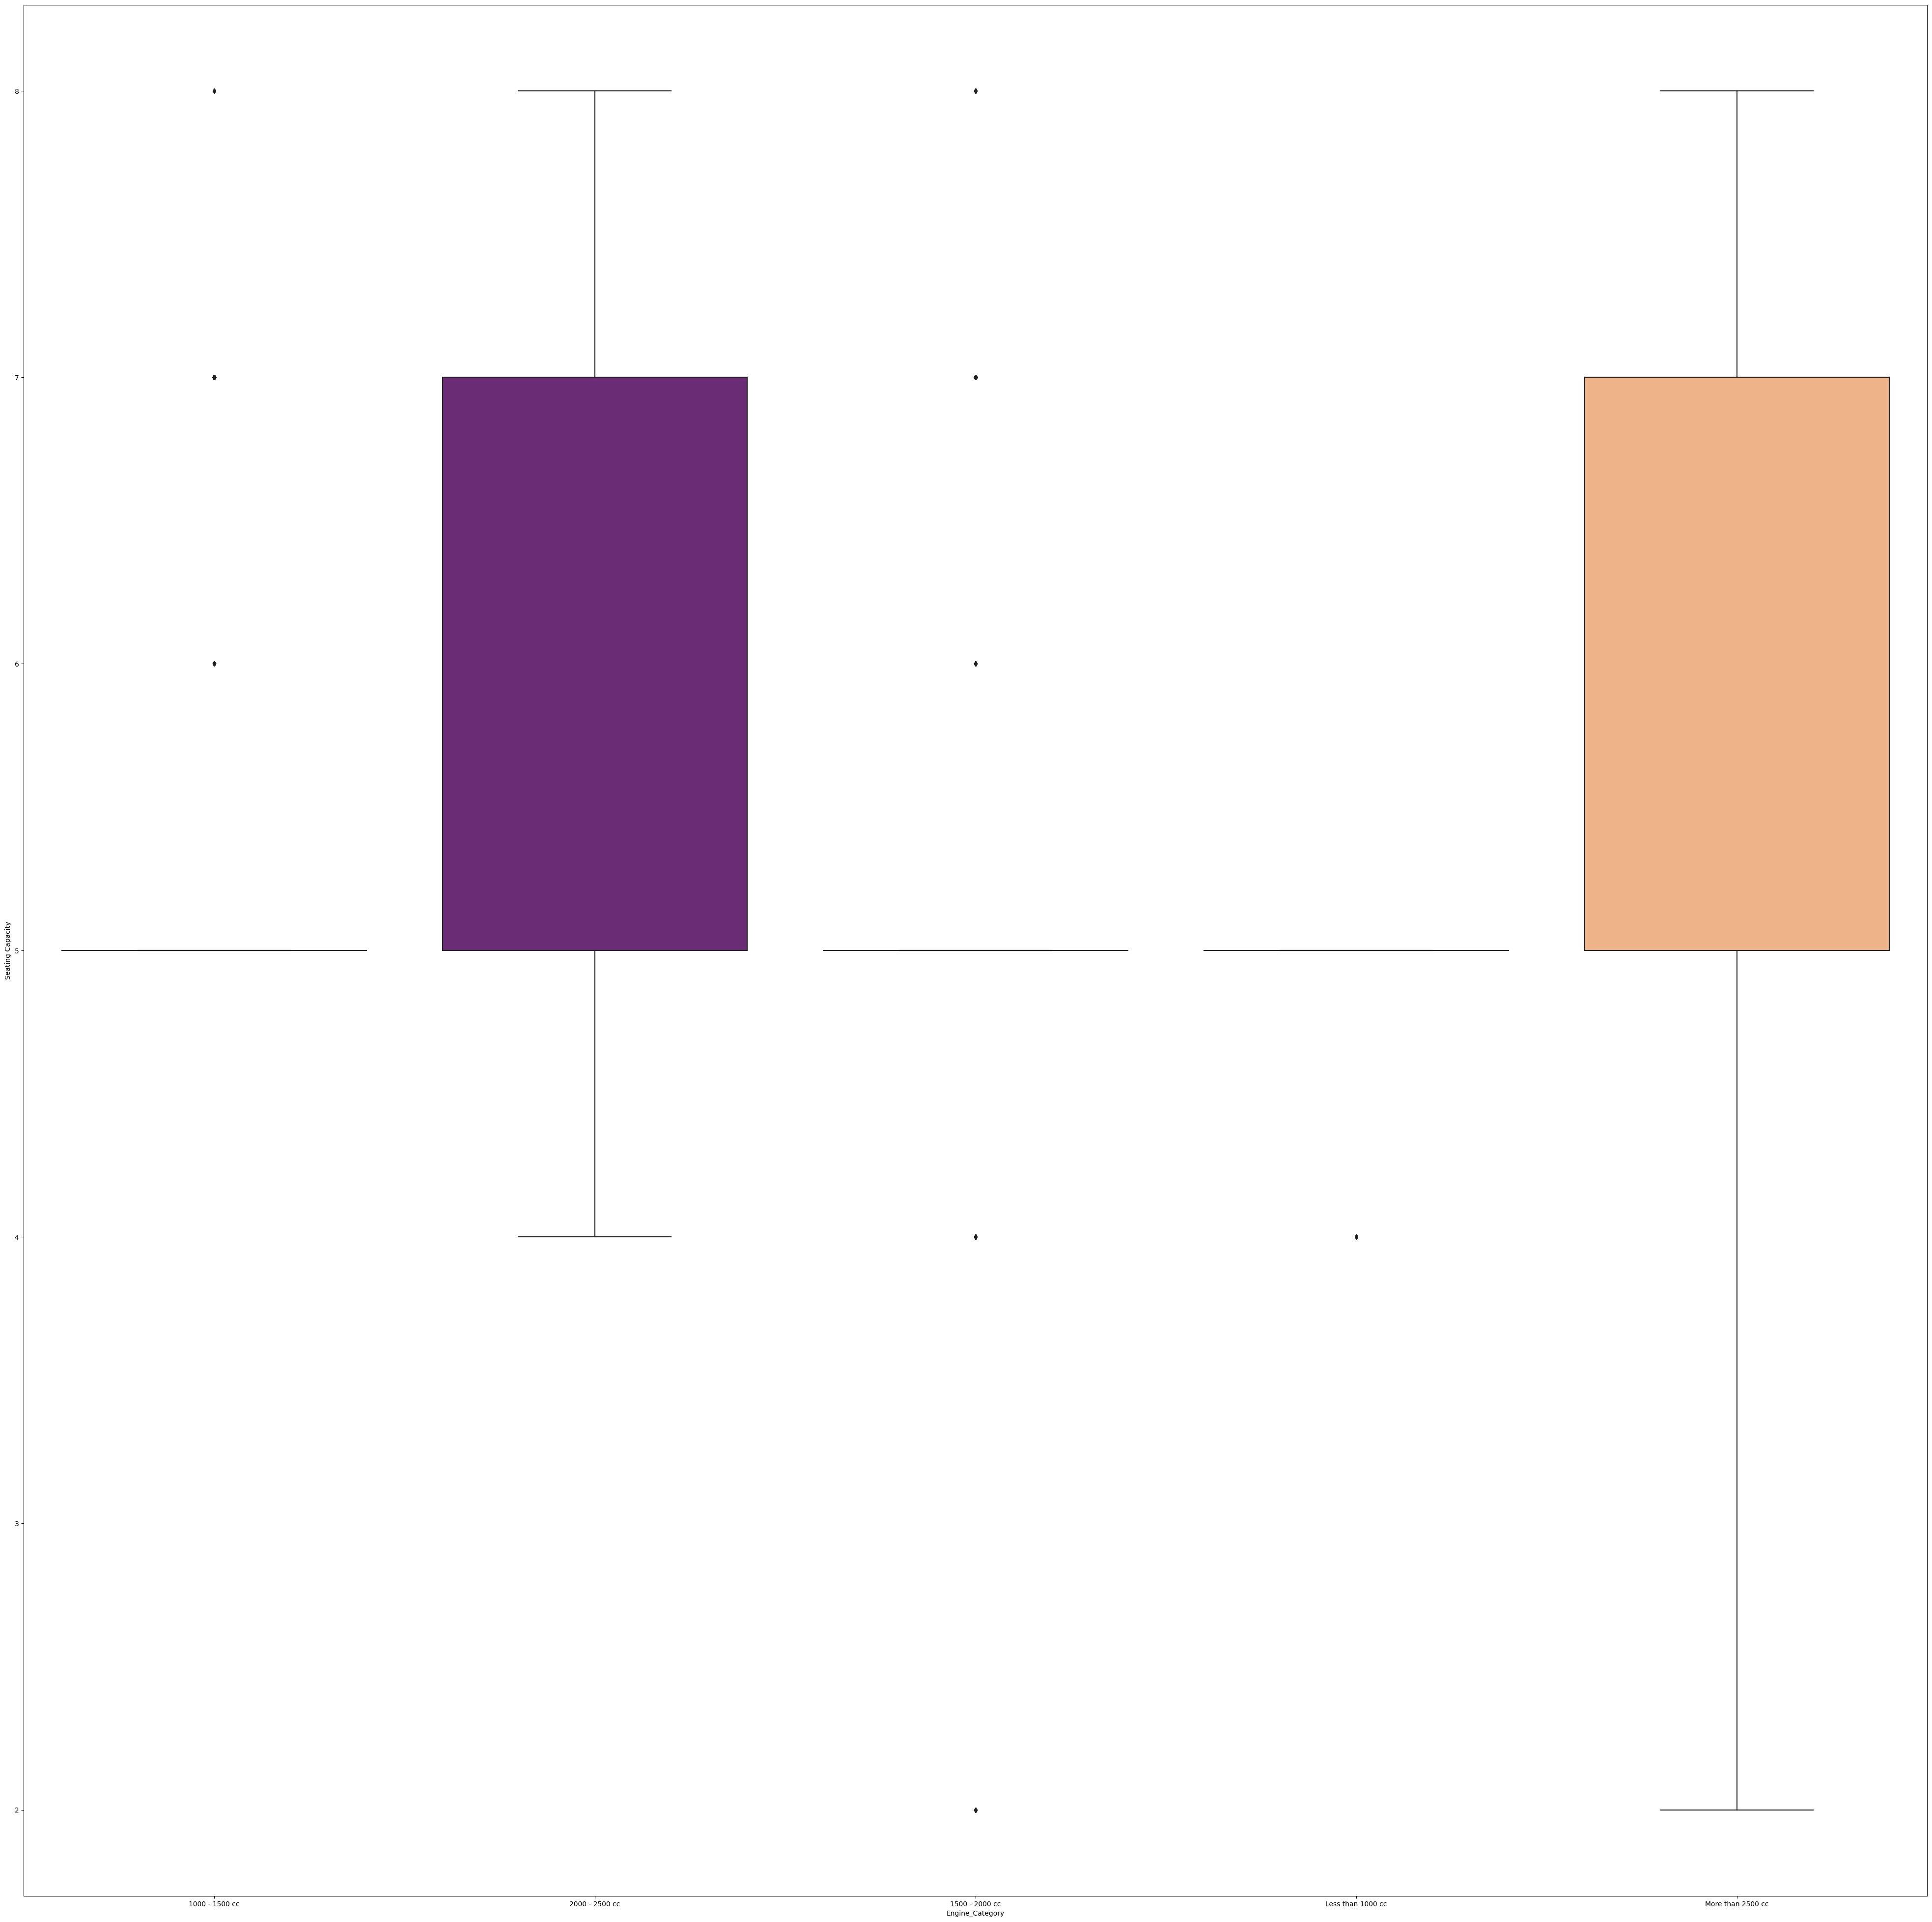

In [62]:
plt.figure(figsize=(50,50))
sns.boxplot(x='Engine_Category', y='Seating Capacity', data=df, palette= 'magma')

In [63]:
df.rename(columns={'Seating Capacity': 'Seating_Capacity'}, inplace=True)

In [64]:
df['Seating_Capacity'].unique()

array([ 5.,  7.,  4., nan,  8.,  2.,  6.])

In [65]:
def impute_seating_capacity(cols):
    Seating_Capacity = cols[0]
    Engine_Category = cols[1]
    

    if pd.isna(Seating_Capacity):

        if Engine_Category == '2000 - 2500 cc':
            return 6
        elif Engine_Category == 'More than 2500 cc':
            return 6
        else:
            return 5
        
    else:
        return Seating_Capacity

In [66]:
df['Seating_Capacity'] = df[['Seating_Capacity', 'Engine_Category']].apply(impute_seating_capacity, axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Drivetrain          2059 non-null   object 
 12  Length              1995 non-null   float64
 13  Width               1995 non-null   float64
 14  Height              1995 non-null   float64
 15  Seating_Capacity    2059 non-null   float64
 16  Fuel_T

In [68]:
df = df.drop(['Length', 'Height', 'Width', 'Model', 'Location'], axis=1)

In [69]:
categorical_feature = df.select_dtypes(include=['object']).columns
numerical_feature = df.select_dtypes(exclude=['object']).drop(columns=['Price']).columns

In [70]:
categorical_feature

Index(['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type',
       'Drivetrain', 'Engine_Category', 'Max_Power_numeric',
       'Max_Torque_numeric'],
      dtype='object')

In [71]:
numerical_feature

Index(['Year', 'Kilometer', 'Seating_Capacity', 'Fuel_Tank_Capacity'], dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [73]:
for feature in categorical_feature:
    if feature in df.columns:  # Ensuring column exists in the DataFrame
        df[feature] = label_encoder.fit_transform(df[feature])


In [74]:
for feature in numerical_feature:
    if feature in df.columns:  # Ensuring column exists in the DataFrame
        df[feature] = label_encoder.fit_transform(df[feature])


In [75]:
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer()

In [76]:
df[numerical_feature] = power_transformer.fit_transform(df[numerical_feature])


In [77]:
df[categorical_feature] = power_transformer.fit_transform(df[categorical_feature])

In [78]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Drivetrain,Seating_Capacity,Fuel_Tank_Capacity,Engine_Category,Max_Power_numeric,Max_Torque_numeric
0,-0.810582,505000,0.097870,1.215039,1.049372,0.904046,-0.755188,-0.476178,-5.675357,-0.018928,-0.307362,-1.447065,-1.073134,1.121838,-1.847237
1,0.486579,450000,-0.806705,0.946315,-0.831907,0.904046,0.871229,1.768917,0.176200,-0.018928,-0.307362,-0.610516,-1.073134,0.970975,-0.504703
2,-0.688426,220000,-1.571652,0.713155,1.049372,0.904046,-0.573526,-0.476178,0.176200,-0.018928,-0.307362,-1.447065,-1.073134,1.034423,-1.638867
3,1.491352,799000,0.775515,-0.486845,1.049372,0.904046,0.430937,-0.476178,0.176200,-0.018928,-0.307362,-1.236885,-1.073134,1.072083,-1.592912
4,1.491352,1950000,0.429362,0.790197,-0.831907,0.904046,-0.755188,-0.476178,0.176200,1.804828,1.936160,0.335381,0.897698,-0.844899,0.509822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.388716,850000,-0.218776,1.270217,-0.831907,0.904046,0.871229,-0.476178,0.176200,-0.018928,1.936160,1.277963,0.897698,-0.963196,0.467248
2055,-0.688426,275000,-0.806705,1.137337,1.049372,0.904046,0.871229,1.768917,0.176200,-0.018928,-0.307362,-1.695230,1.272513,0.734892,1.320584
2056,-0.936895,240000,-1.077538,0.912247,1.049372,0.904046,0.648599,-0.476178,0.176200,-0.018928,-0.307362,-0.266078,-1.073134,0.919580,-1.978730
2057,-1.674820,4290000,0.429362,0.490122,-0.831907,-1.106138,0.871229,-0.476178,0.176200,1.804828,-0.307362,0.996264,0.280295,-0.280372,0.697399
